<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-258-Deep_Learning/blob/main/Assignment_05/01_Simple_Image_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

# Install Keras Hub
!pip install --upgrade --quiet keras-hub-nightly keras-nightly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.8/721.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.4 MB/s eta 0:00:00


In [ ]:
# Set Keras backend to JAX for efficiency
os.environ["KERAS_BACKEND"] = "jax"  # or "tensorflow" or "torch"
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = "1.0"

In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import keras_hub
import tensorflow_datasets as tfds
import tensorflow as tf # import tensorflow

In [ ]:
# Load CIFAR-10 dataset
dataset, info = tfds.load("cifar10", as_supervised=True, with_info=True)
train_ds, test_ds = dataset["train"].take(10000), dataset["test"].take(2000)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.8SUA54_3.0.2/cifar10-train.tfrecord*...:   0%|         …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.8SUA54_3.0.2/cifar10-test.tfrecord*...:   0%|          …

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [ ]:
def preprocess(image, label):
    image = tf.image.resize(image, (224, 224))  # Use tf.image.resize for resizing
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0,1]
    return image, label

In [ ]:
# Apply preprocessing and batching
BATCH_SIZE = 10
train_ds = train_ds.map(preprocess).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


In [ ]:
# Load Keras Hub ResNet50 model
image_classifier = keras_hub.models.ImageClassifier.from_preset(
    "resnet_50_imagenet",
    activation="softmax",
)

100%|██████████| 841/841 [00:00<00:00, 2.07MB/s]


100%|██████████| 3.59k/3.59k [00:00<00:00, 2.85MB/s]


100%|██████████| 98.1M/98.1M [00:02<00:00, 50.9MB/s]


100%|██████████| 90.3M/90.3M [00:00<00:00, 112MB/s]


In [ ]:
# Modify model for CIFAR-10 (10 classes instead of 1000 in ImageNet)
inputs = keras.Input(shape=(224, 224, 3))
x = image_classifier.backbone(inputs)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(10, activation="softmax")(x)

In [ ]:
# Define final model
model = keras.Model(inputs, x)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Train model
history = model.fit(train_ds, epochs=5, validation_data=test_ds)

Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 210s 187ms/step - accuracy: 0.6175 - loss: 1.1178 - val_accuracy: 0.8535 - val_loss: 0.4482
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 128s 116ms/step - accuracy: 0.8482 - loss: 0.4390 - val_accuracy: 0.8800 - val_loss: 0.3371
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 147s 147ms/step - accuracy: 0.9023 - loss: 0.2877 - val_accuracy: 0.8790 - val_loss: 0.3706
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 117s 116ms/step - accuracy: 0.9327 - loss: 0.2098 - val_accuracy: 0.8835 - val_loss: 0.3591
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 117s 116ms/step - accuracy: 0.9378 - loss: 0.1764 - val_accuracy: 0.8765 - val_loss: 0.3877


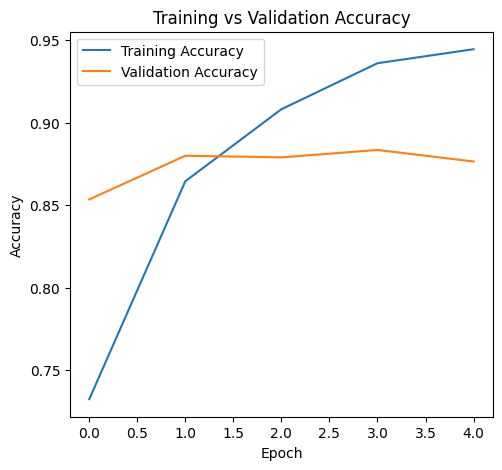

In [ ]:
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

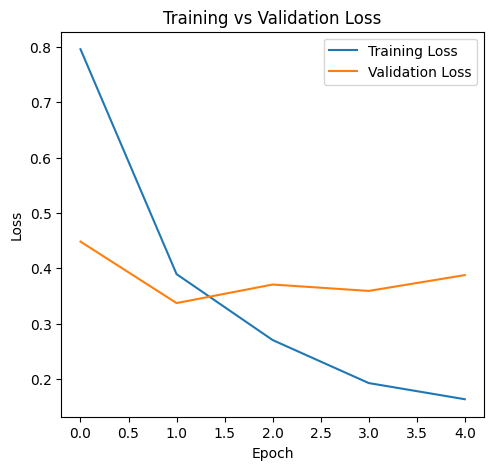

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Show model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_net_backbone (ResNetBackbone)    │ (None, 7, 7, 2048)          │      23,561,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          20,490 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 70,638,688 (269.47 MB)

 Trainable params: 23,528,522 (89.75 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 47,057,046 (179.51 MB)

In [ ]:
# Test model on a batch of CIFAR-10 images
batch_images, batch_labels = next(iter(test_ds.take(1)))
preds = model.predict(batch_images[:5])  # Predict first 5 images
pred_labels = np.argmax(preds, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


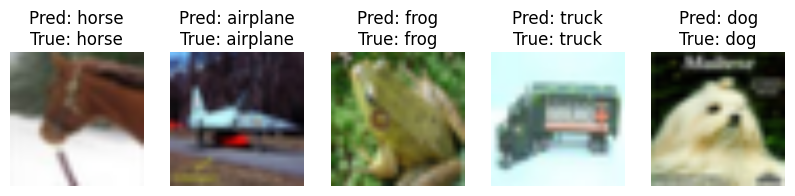

In [ ]:
# Show predictions
plt.figure(figsize=(10, 5))
class_names = info.features['label'].names
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(batch_images[i].numpy())
    plt.title(f"Pred: {class_names[pred_labels[i]]}\nTrue: {class_names[batch_labels[i]]}")
    plt.axis("off")
plt.show()
